<a href="https://colab.research.google.com/github/Jectrianama/GCCE_TEST/blob/main/GCECDL1/Occupancy_gcce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subclassing for GCE

In [1]:
!git clone https://github.com/Jectrianama/GCCE_TEST.git

Cloning into 'GCCE_TEST'...
remote: Enumerating objects: 700, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 700 (delta 159), reused 215 (delta 122), pack-reused 407
Receiving objects: 100% (700/700), 31.57 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (327/327), done.


In [2]:
 
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode 
import numpy as np

def ook(t):
  lb = LabelBinarizer()
  y_ook = lb.fit_transform(t)  

  if len(np.unique(t))==2:
    y_ook = np.concatenate((1-y_ook.astype(bool), y_ook), axis = 1) 

  return y_ook

In [3]:
#cargar datos desde drive otros dataset
FILEID = "1AU8pTtCLihBjCZjWITaAzpnEuL4RO436"
#https://drive.google.com/file/d/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  DataGCCE.zip && rm -rf /tmp/cookies.txt
!unzip -o DataGCCE.zip
!dir

--2023-02-11 06:09:55--  https://docs.google.com/uc?export=download&confirm=&id=1AU8pTtCLihBjCZjWITaAzpnEuL4RO436
Resolving docs.google.com (docs.google.com)... 142.251.16.101, 142.251.16.138, 142.251.16.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oe6qu1bmg5c2mt9hqh5dvqv90q0isqmo/1676095725000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=73e75e53-5ccd-4fa0-a58f-703955a7a0bd [following]
--2023-02-11 06:09:55--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oe6qu1bmg5c2mt9hqh5dvqv90q0isqmo/1676095725000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=73e75e53-5ccd-4fa0-a58f-703955a7a0bd
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 142.250.31.132, 2

# Load Data

In [4]:
#cargar datos desde drive acceso libre
FILEID = "1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW"
#https://drive.google.com/file/d/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MADatasets.zip && rm -rf /tmp/cookies.txt
!unzip -o MADatasets.zip
!dir

--2023-02-11 06:09:56--  https://docs.google.com/uc?export=download&confirm=t&id=1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW
Resolving docs.google.com (docs.google.com)... 142.251.16.101, 142.251.16.138, 142.251.16.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0b7g49rmhicknmqibjidarh28e3atbh6/1676095725000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=f343be4a-a430-422b-83b0-c80d595af3f2 [following]
--2023-02-11 06:09:56--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0b7g49rmhicknmqibjidarh28e3atbh6/1676095725000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=f343be4a-a430-422b-83b0-c80d595af3f2
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 142.250.31.132, 

In [5]:
#load data
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf #importar tensorflow
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
database = 'Ocupancy'#['bupa1', 'breast-cancer-wisconsin1','pima-indians-diabetes1', 'ionosphere1', 'tic-tac-toe1', 'iris1', 'wine1', 'segmentation1']


import pandas as pd
from sklearn.preprocessing import LabelEncoder

dfo= pd.read_csv(r'/content//file.csv')
dfo
 
#Removing the HumidityRatio attribute which is least correlated to the target attribute 
t=dfo['Occupancy'].values
X = dfo.drop(['HumidityRatio','Occupancy'], axis = 1).values

t=t+1

In [6]:
import os
os.chdir('/content/GCCE_TEST/Models')
from  keras_ma_gcce import *
from labels_generation import MA_Clas_Gen

# Labels Generation  

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


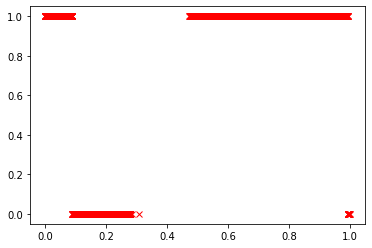

In [7]:
Y, iAnn, Lam_r = MA_Clas_Gen(X ,t, R=5, NrP=1)

In [8]:

Y = Y - 1
t = t - 1



annotator 1
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1693
           1       0.70      1.00      0.83       972

    accuracy                           0.85      2665
   macro avg       0.85      0.88      0.84      2665
weighted avg       0.89      0.85      0.85      2665

annotator 2
              precision    recall  f1-score   support

           0       1.00      0.33      0.50      1693
           1       0.46      1.00      0.63       972

    accuracy                           0.58      2665
   macro avg       0.73      0.67      0.57      2665
weighted avg       0.80      0.58      0.55      2665

annotator 3
              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1693
           1       0.85      0.41      0.56       972

    accuracy                           0.76      2665
   macro avg       0.80      0.69      0.70      2665
weighted avg       0.78      0.76     

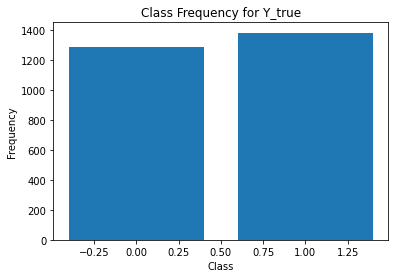

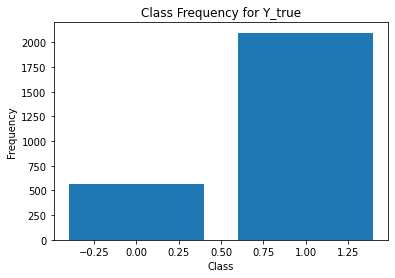

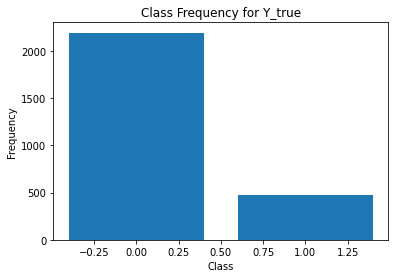

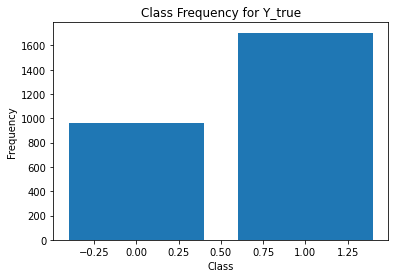

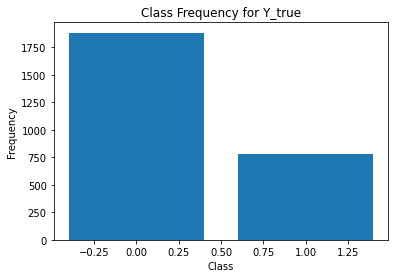

In [9]:
from sklearn.metrics import classification_report
for i in range(Y.shape[1]):
    print('annotator',i+1)
    print(classification_report(t,Y[:,i]))
    unique, counts = np.unique(Y[:,i], return_counts=True)
    plt.figure()
    plt.bar(unique, counts)
#     unique, counts = np.unique(Y_test[5], return_counts=True)
#     plt.bar(unique, counts)

    plt.title('Class Frequency for Y_true')
    plt.xlabel('Class')
    plt.ylabel('Frequency')


# Split data

In [10]:
import numpy.matlib
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
Ns = 1
ss = ShuffleSplit(n_splits=Ns, test_size=0.3,random_state =123)
for train_index, test_index in ss.split(X):
    print(test_index)
    X_train, X_test,Y_train,Y_test = X[train_index,:], X[test_index,:],Y[train_index,:], Y[test_index,:]
    Y_true_train, Y_true_test = t[train_index].reshape(-1,1), t[test_index].reshape(-1,1)
print(X_train.shape, Y_train.shape, Y_true_train.shape)

[ 315  235 1480 1538 1087 1009 1677 1094  343 2175 1455 2535 2641  798
  417 2238 1781 1445   85 1828 2029 1034 1067 1458 2455  732 2434 2247
 2113 2386  689  853 2200 2500  179 1245 1758 1927  709 1826 2529 1099
  805  601 1022 1730 2135 1361 2294 2644  206  420  878 2093 1400 1518
  934 1622 1279  613  957  190   33 1450  335 1371 2634  103  304 1228
 2242 2384 1637  673  222 2340 1765  360  289   25   45 1937  537 1237
 1183 2095 2375 2379 2390 2170 2607  589 1833 2628  354  189 2016 1286
 1116  556 1918  937 1740  803 2435  257  807 1697 2494 2538  249  683
 1673 1391  871 1064 1364  814  184  498 1898 1017 1055  906  645  242
  684  779  784 1696 1226  423  966 2596  649 1008 2402  101 1283 1529
 2417 1449  616 1107 1845 1011 1572 2525 2380 2651  704 1089  466 1853
 2462 1726 2502 2479 1710 1050  469  220  336  263 1535  554 2590 1273
 2543  861  449 1224 1957 2537 1106  114 1213 2194  830  973 1504 2168
  777 1975  996 2025 2094  707  994 2315 1970  748 1982 2430 1511   43
 2291 

# Apply MinMaxScaler

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Testing the Class 


iteration: 0


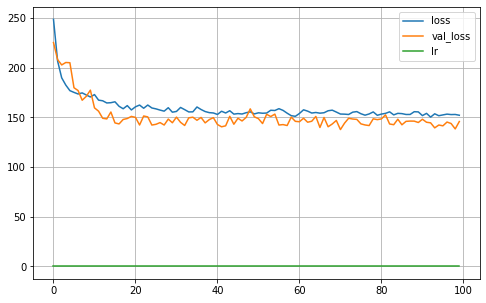

25/25 [==============================] - 0s 1ms/step
Validation ACC: 0.9637
Validation Balanced_ACC: 0.9258
Validation MI: 0.4940
Validation Normalized MI: 0.7635
Validation Adjusted MI: 0.7633
Validation aUc: 0.9629
Validation aUc_Sklearn: 0.9890
iteration: 1


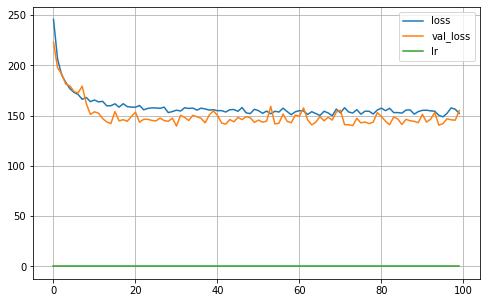

25/25 [==============================] - 0s 1ms/step
Validation ACC: 0.9587
Validation Balanced_ACC: 0.9199
Validation MI: 0.4824
Validation Normalized MI: 0.7431
Validation Adjusted MI: 0.7428
Validation aUc: 0.9599
Validation aUc_Sklearn: 0.9872
iteration: 2


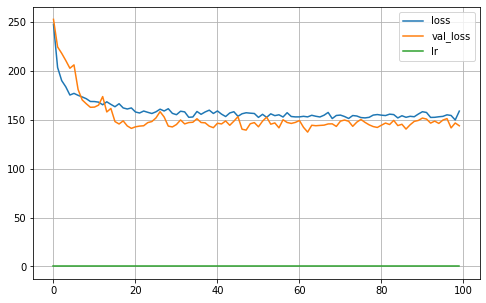

25/25 [==============================] - 0s 1ms/step
Validation ACC: 0.9550
Validation Balanced_ACC: 0.9090
Validation MI: 0.4685
Validation Normalized MI: 0.7228
Validation Adjusted MI: 0.7225
Validation aUc: 0.9545
Validation aUc_Sklearn: 0.9863
iteration: 3


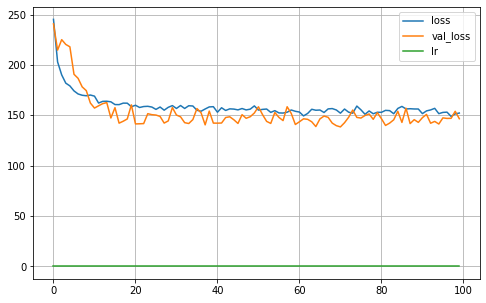

25/25 [==============================] - 0s 1ms/step
Validation ACC: 0.9587
Validation Balanced_ACC: 0.9164
Validation MI: 0.4794
Validation Normalized MI: 0.7400
Validation Adjusted MI: 0.7398
Validation aUc: 0.9582
Validation aUc_Sklearn: 0.9895
iteration: 4


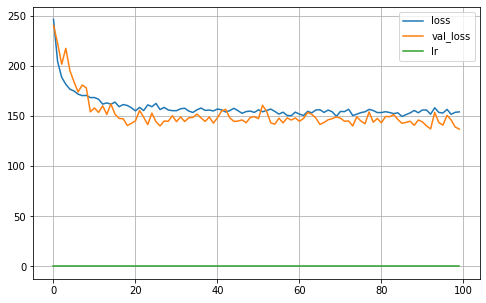

25/25 [==============================] - 0s 1ms/step
Validation ACC: 0.9663
Validation Balanced_ACC: 0.9279
Validation MI: 0.4999
Validation Normalized MI: 0.7744
Validation Adjusted MI: 0.7742
Validation aUc: 0.9639
Validation aUc_Sklearn: 0.9905
iteration: 5


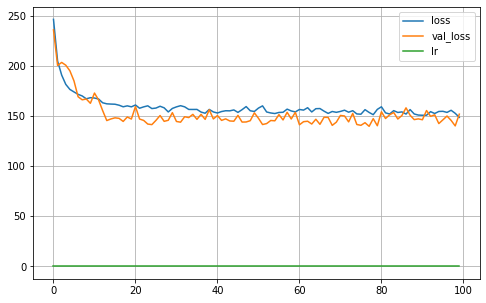

25/25 [==============================] - 0s 1ms/step
Validation ACC: 0.9537
Validation Balanced_ACC: 0.9054
Validation MI: 0.4640
Validation Normalized MI: 0.7164
Validation Adjusted MI: 0.7161
Validation aUc: 0.9527
Validation aUc_Sklearn: 0.9874
iteration: 6


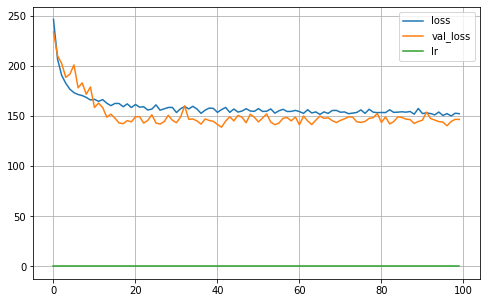

25/25 [==============================] - 0s 1ms/step
Validation ACC: 0.9587
Validation Balanced_ACC: 0.9199
Validation MI: 0.4824
Validation Normalized MI: 0.7431
Validation Adjusted MI: 0.7428
Validation aUc: 0.9599
Validation aUc_Sklearn: 0.9862
iteration: 7


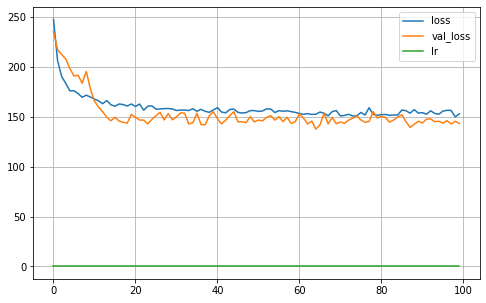

25/25 [==============================] - 0s 1ms/step
Validation ACC: 0.9613
Validation Balanced_ACC: 0.9237
Validation MI: 0.4888
Validation Normalized MI: 0.7537
Validation Adjusted MI: 0.7535
Validation aUc: 0.9618
Validation aUc_Sklearn: 0.9882
iteration: 8


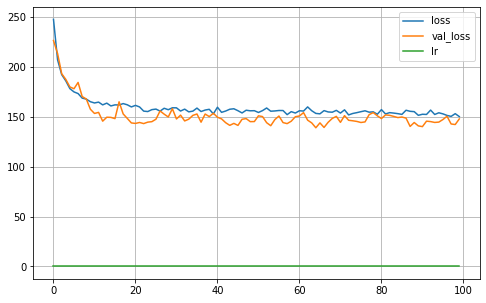

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9663
Validation Balanced_ACC: 0.9382
Validation MI: 0.5093
Validation Normalized MI: 0.7836
Validation Adjusted MI: 0.7833
Validation aUc: 0.9691
Validation aUc_Sklearn: 0.9911
iteration: 9


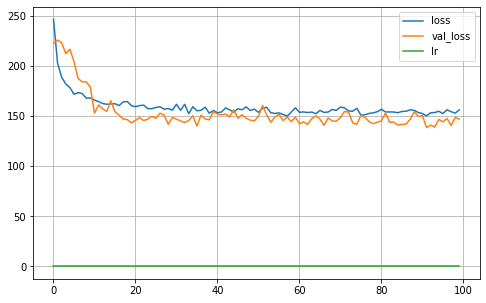

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9587
Validation Balanced_ACC: 0.9199
Validation MI: 0.4824
Validation Normalized MI: 0.7431
Validation Adjusted MI: 0.7428
Validation aUc: 0.9599
Validation aUc_Sklearn: 0.9878


In [12]:
from sklearn.metrics import classification_report, balanced_accuracy_score,  roc_auc_score
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
l1 =0.1
NUM_RUNS =10
ACC = np.zeros(NUM_RUNS)
AUC = np.zeros(NUM_RUNS)
AUCSK = np.zeros(NUM_RUNS)
MI = np.zeros(NUM_RUNS)
NMI = np.zeros(NUM_RUNS)
AMI = np.zeros(NUM_RUNS)
BACC = np.zeros(NUM_RUNS)
for i in range(NUM_RUNS): #10
    print("iteration: " + str(i))
   
    MA = Keras_MA_GCCE(epochs=100,batch_size=64,R=5, K=len(np.unique(Y_true_train)), dropout=0.2, learning_rate=0.01,optimizer='Adam', 
                l1_param=l1,  validation_split=0.30, verbose=0, q=0.1, neurons=4)

    MA.fit(X_train, Y_train)
    MA.plot_history()
  
    #Accuracy
    pred_2 = MA.predict(X_test)
 
    report = classification_report( pred_2[:,Y.shape[1]:].argmax(axis=1),Y_true_test.ravel(),output_dict=True)
    ACC[i] = report['accuracy']
    print("Validation ACC: %.4f" % (float(ACC[i])))


    # balanced. Accurcy
    BACC[i] = balanced_accuracy_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze(), adjusted=True)
    print("Validation Balanced_ACC: %.4f" % (float(BACC[i])))

    #MI
    
    MI[i] = mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation MI: %.4f" % (float(MI[i]),))
    NMI[i] = normalized_mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation Normalized MI: %.4f" % (float(NMI[i]),))
    AMI[i]= adjusted_mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation Adjusted MI: %.4f" % (float(AMI[i]),))


    #AUC
    val_AUC_metric = tf.keras.metrics.AUC( from_logits = True)  
   # val_logits =MA.predict(X_test) # model(X_test, training=False)
    # tf.print(y_batch_val)
    val_AUC_metric.update_state(Y_true_test, pred_2[:,Y.shape[1]:].argmax(axis=1).astype('float'))

    val_AUC = val_AUC_metric.result()
    val_AUC_metric.reset_states()
    val_AUC = val_AUC.numpy()
    print("Validation aUc: %.4f" % (float(val_AUC),))
    AUC[i] = val_AUC
    val_AUC1 = roc_auc_score(ook(Y_true_test), pred_2[:,Y_train.shape[1]:])
    print("Validation aUc_Sklearn: %.4f" % (float(val_AUC1),))
    AUCSK[i] = val_AUC1


In [13]:

ACC

array([0.96375, 0.95875, 0.955  , 0.95875, 0.96625, 0.95375, 0.95875,
       0.96125, 0.96625, 0.95875])

In [14]:

AUC

array([0.96289694, 0.95993757, 0.9545027 , 0.95822275, 0.96394789,
       0.95269114, 0.95993757, 0.96184593, 0.96909225, 0.95993757])

In [15]:
print('Average Accuracy: ', np.round( ACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( ACC),4)*100)
print('==============================================')
print('Average AUC: ', np.round( AUC.mean(),4)*100) 
print('Average AUC std: ',np.round(np.std( AUC),4)*100)
print('==============================================')
print('Average AUC Sklearn: ', np.round( AUCSK.mean(),4)*100) 
print('Average AUC SK std: ',np.round(np.std( AUCSK),4)*100)
print('==============================================')
print('Average Balanced Accuracy: ', np.round( BACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( BACC),4)*100)
print('==============================================')
print('Average MI: ', np.round( MI.mean(),4)*100) 
print('Average std: ',np.round(np.std(MI),4)*100)
print('==============================================')
print('Average Normalized MI: ', np.round( NMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(NMI),4)*100)
print('==============================================')
print('Average Ajdusted MI: ', np.round( AMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(AMI),4)*100)

Average Accuracy:  96.00999999999999
Average std:  0.4
Average AUC:  96.03
Average AUC std:  0.44
Average AUC Sklearn:  98.83
Average AUC SK std:  0.16
Average Balanced Accuracy:  92.06
Average std:  0.89
Average MI:  48.51
Average std:  1.29
Average Normalized MI:  74.83999999999999
Average std:  2.0
Average Ajdusted MI:  74.81
Average std:  2.0


In [16]:
import pickle

# create the dictionary with 6 scalar variables
Metrics = {
    'Accuracy': np.round( ACC.mean(),4)*100,
    'Accuracy_std': np.round(np.std( ACC),4)*100,
    'AUC': np.round( AUC.mean(),4)*100,
    'AUC_std': np.round(np.std( AUC),4)*100,
    'AUCSK': np.round( AUCSK.mean(),4)*100,
    'AUCSK_std': np.round(np.std( AUCSK),4)*100,
    'Balanced Accuracy': np.round( BACC.mean(),4)*100,
    'Balanced Accuracy_std':  np.round(np.std(BACC),4)*100,
    'MI': np.round( MI.mean(),4)*100,
    'MI_std': np.round(np.std(MI),4)*100,
    'Normalized MI': np.round( NMI.mean(),4)*100,
    'Normalized MI_std': np.round(np.std(NMI),4)*100,
    'Adjusted MI': np.round( AMI.mean(),4)*100,
    'Adjusted MI_std': np.round(np.std(NMI),4)*100,
}

# save the dictionary to a file using pickle
with open('data.pickle', 'wb') as handle:
    pickle.dump(Metrics, handle, protocol=pickle.HIGHEST_PROTOCOL)
Metrics

{'Accuracy': 96.00999999999999,
 'Accuracy_std': 0.4,
 'AUC': 96.03,
 'AUC_std': 0.44,
 'AUCSK': 98.83,
 'AUCSK_std': 0.16,
 'Balanced Accuracy': 92.06,
 'Balanced Accuracy_std': 0.89,
 'MI': 48.51,
 'MI_std': 1.29,
 'Normalized MI': 74.83999999999999,
 'Normalized MI_std': 2.0,
 'Adjusted MI': 74.81,
 'Adjusted MI_std': 2.0}